In [1]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import os.path as osp
import os
from glob import glob

import numpy as np

In [2]:
type = 'Another_Samples'

In [9]:
class Augmentation:
    def __init__(self, ratio):
        self.ratio = ratio
        self.transform_init = A.Compose([
            # A.RandomCrop(width=256, height=256),
            A.VerticalFlip(p=0.5),
            # A.RandomBrightnessContrast(p=ratio),
            A.HorizontalFlip(p=ratio)
        ])
        self.type = 'Another_Samples_Augmentation__'
        self.save_folder = osp.join('data/sam/augmentation', self.type)
        
        self.images_folder = osp.join(self.save_folder, 'images')
        self.labels_folder = osp.join(self.save_folder, 'labels')
        
        os.makedirs(self.save_folder, exist_ok=True)   
        
        if (not osp.exists(self.images_folder)) and (not osp.exists(self.labels_folder)) :     
            os.makedirs(self.images_folder, exist_ok=True)
            os.makedirs(self.labels_folder, exist_ok=True)  

        
        
    def __get_path__(self, image_path):
        path = image_path.split(sep = 'images')
        path_mask = path[0] + 'labels/' + osp.basename(image_path)
        return path_mask
    
    def transform(self, image_path):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        path_mask = self.__get_path__(image_path)
        print(path_mask)
        mask = cv2.imread(path_mask)
        
        transformed = self.transform_init(image=image, mask=mask)
        transformed_image = transformed['image']
        transformed_mask = transformed['mask']       
        
        
        return transformed_image, transformed_mask
    
    def __save__(self, image, image_path, flag = 1):    
        
        basename = osp.basename(image_path).split('.')[0] + f'brightness_{int(self.ratio*100)}.png'
        if flag == 1:
            cv2.imwrite(osp.join(self.images_folder, basename), image)     
        else:
            cv2.imwrite(osp.join(self.labels_folder, basename), image)   

In [10]:
img_folder = 'data/sam/augmentation/Another_Samples_Augmentation_/images'
mask_folder = 'data/sam/augmentation/Another_Samples_Augmenatation_/labels'

In [11]:
ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [12]:
for ratio in ratios: 
    aug = Augmentation(ratio)
    for img_path in glob(img_folder + '/*.png'):        
        transformed_image, transformed_mask = aug.transform(image_path = img_path)
        aug.__save__(transformed_image, img_path, flag = 1)
        aug.__save__(transformed_mask, img_path, flag = 0)


data/sam/augmentation/Another_Samples_Augmentation_/labels/Image(1)brightness_10.png
data/sam/augmentation/Another_Samples_Augmentation_/labels/Image(1)brightness_20.png
data/sam/augmentation/Another_Samples_Augmentation_/labels/Image(1)brightness_30.png
data/sam/augmentation/Another_Samples_Augmentation_/labels/Image(1)brightness_40.png
data/sam/augmentation/Another_Samples_Augmentation_/labels/Image(1)brightness_50.png
data/sam/augmentation/Another_Samples_Augmentation_/labels/Image(1)brightness_60.png
data/sam/augmentation/Another_Samples_Augmentation_/labels/Image(1)brightness_70.png
data/sam/augmentation/Another_Samples_Augmentation_/labels/Image(1)brightness_80.png
data/sam/augmentation/Another_Samples_Augmentation_/labels/Image(10)brightness_10.png
data/sam/augmentation/Another_Samples_Augmentation_/labels/Image(10)brightness_20.png
data/sam/augmentation/Another_Samples_Augmentation_/labels/Image(10)brightness_30.png
data/sam/augmentation/Another_Samples_Augmentation_/labels/Ima

In [ ]:
#flip chi, sub images from an image

In [37]:
import albumentations as A
import cv2
def augment(brightness_ratio):
    transform = A.Compose([
        # A.RandomCrop(width=256, height=256),
        # A.HorizontalFlip(p=0.5),
        # A.RandomBrightnessContrast(p=brightness_ratio),
        A.VerticalFlip(p=0.5),
    ])
    return transform

In [12]:
path_img = 'data/sam/augmentation/Flip_Chip/images/Image_(1)_s001.png'
path_mask = 'data/sam/augmentation/Flip_Chip/labels/Image_(1)_s001.png'

In [5]:
path_img

'data/sam/2024_03_06/Flip_Chip/images/Image_(1).png'

In [13]:
image = cv2.imread(path_img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [14]:
mask = cv2.imread(path_mask)

In [36]:
brightness_ratios = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
for ratio in brightness_ratios:
    transform = augment(ratio)
    
    transformed = transform(image=image, mask=mask)
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
    
    plt.imshow(transformed_image)
    # plt.imshow(transformed_mask)
    plt.show()

AttributeError: module 'albumentations' has no attribute 'VerticalFlipFlip'

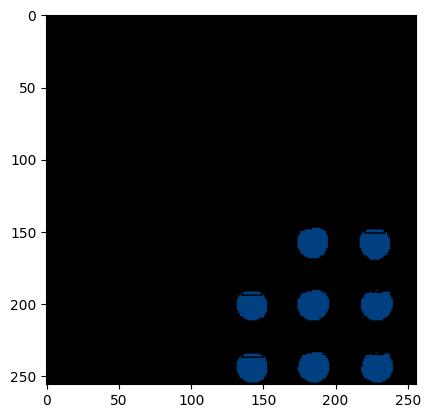

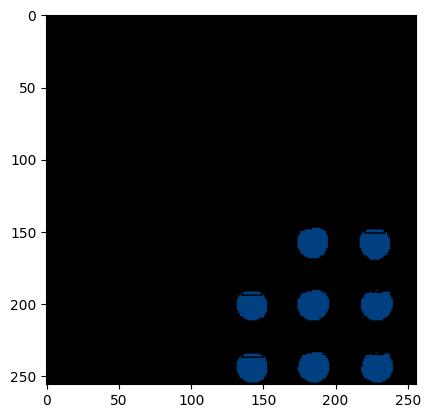

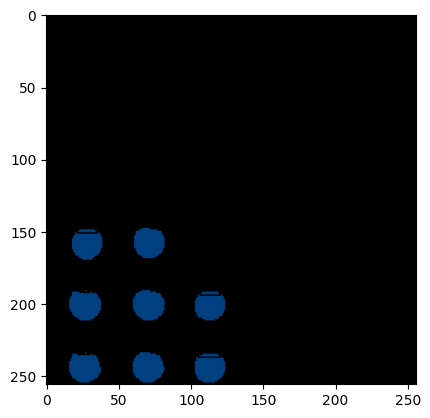

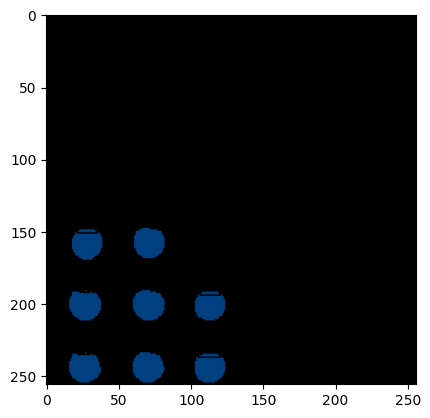

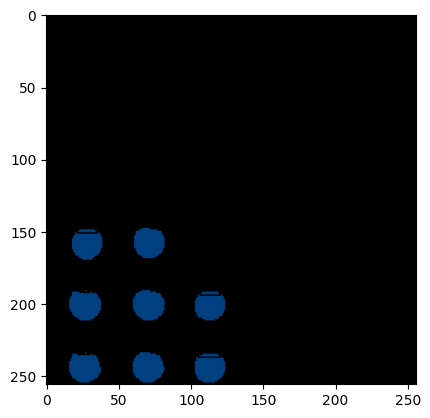

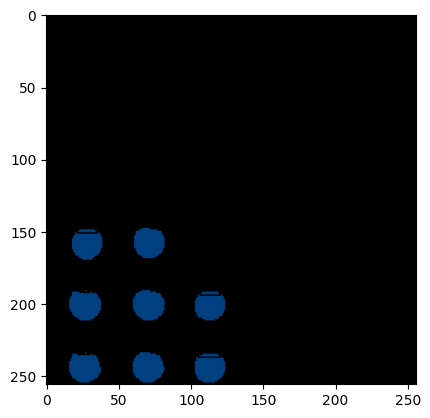

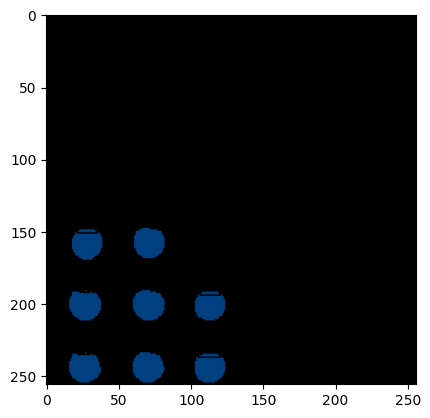

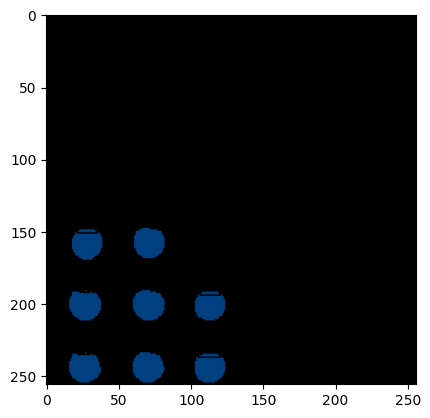

In [29]:
brightness_ratios = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
for ratio in brightness_ratios:
    transform = augment(ratio)
    
    transformed = transform(image=image, mask=mask)
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
    
    # plt.imshow(transformed_image)
    plt.imshow(transformed_mask)
    plt.show()